# Simulating Life

In [1]:
! pip install livelossplot

In [2]:
import random
import time
from matplotlib import pyplot as plt
from livelossplot import PlotLosses

In [3]:
def create_cell():
    return dict(health=random.randint(1, 100),
                strength=random.randint(1, 100))

In [4]:
def birth(offspring):
    return [create_cell() for _ in range(offspring)]

In [5]:
def evaluate(cells):
    for cell in cells:
        cell['health'] *= cell['strength'] / 100
    return cells

In [6]:
RPRD_RATE = 25

def reproduce(cells):
    return [create_cell() for cell in cells if cell['health'] > RPRD_RATE]

In [7]:
DEATH_RATE = 25

def death(cells):
    return [cell for cell in cells if cell['health'] > DEATH_RATE]

In [8]:
def run_generation(cells):
    cells = evaluate(cells)
    cells.extend(reproduce(cells))
    return death(cells)

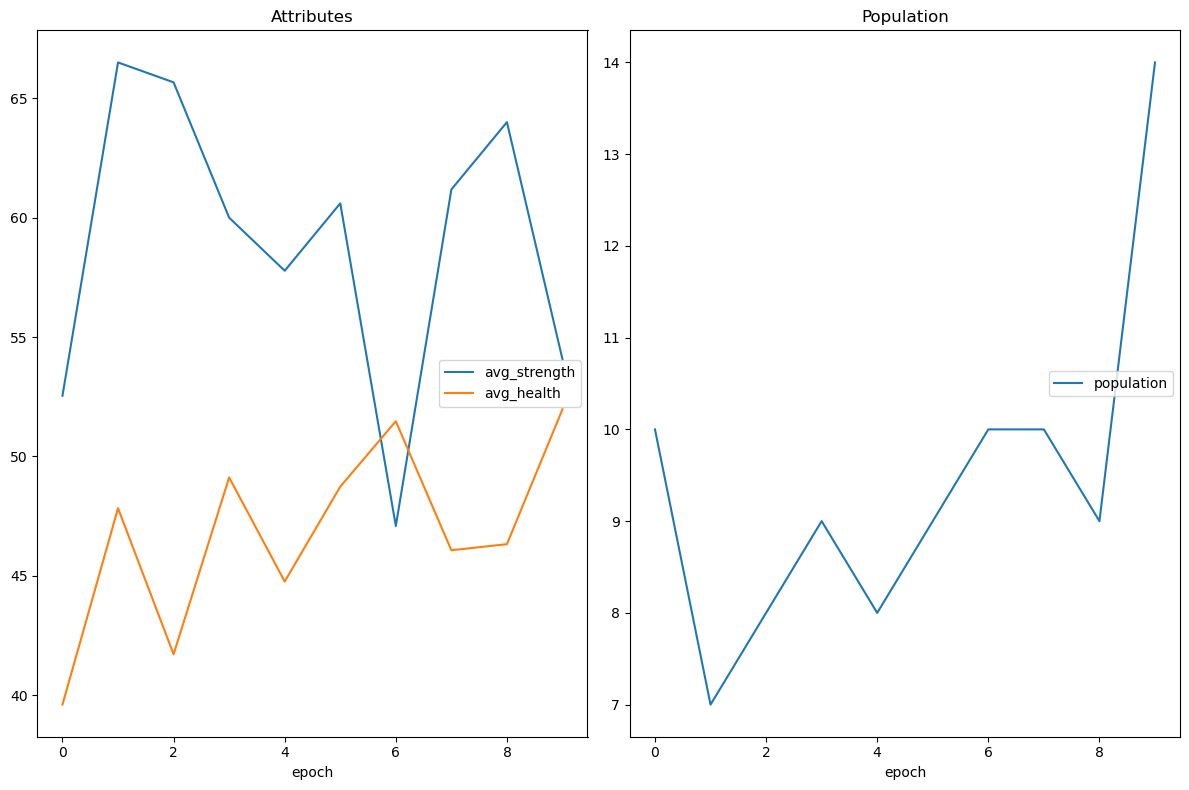

Attributes
	avg_strength     	 (min:   47.091, max:   66.500, cur:   54.067)
	avg_health       	 (min:   39.611, max:   51.979, cur:   51.979)
Population
	population       	 (min:    7.000, max:   14.000, cur:   14.000)


In [13]:
GENERATIONS = 10
INITIAL_OFFSPRING = 10
REPRODUCTION_RATE = 50
DEATH_RATE = 25

cells = birth(INITIAL_OFFSPRING)

groups = {'Population': ['population'],
          'Attributes': ['avg_strength', 'avg_health']}

liveloss = PlotLosses(groups=groups)

history = {}

for _ in range(GENERATIONS):
    cells = run_generation(cells)
    
    history["population"] = len(cells)
    
    history["avg_strength"] = sum([cell["strength"] for cell in cells]) / (len(cells) + 1) 
    
    history["avg_health"] = sum([cell["health"] for cell in cells]) / (len(cells) + 1) 
    
    liveloss.update(history)
    
    liveloss.send() 